In [1]:
# # ------------------------------ ATTENTION ------------------------------ ##
# # You may need to install the nptyping package (>>> pip install nptyping)
# # for numpy type indicators
# # ====================================================================== ##

---
# Multicell Profile
---

Import of the `BeamSection` class from the `FlightBEND` package. If you cloned the ropository use the cell below in all exemples as well. 

In [2]:
import sys
sys.path.append('../src')
sys.path.append('../mesh_files')

If you have the ``FlightBEND`` package installed use the cell below:

In [3]:
# Import BeamSection class
from FlightBEND.beam_section import BeamSection

#### _Mesh file import._

The first file is a mesh that contains 88 quadrilateral elements with 9 nodes, and the second contains 2244 to test the accuracy and efficiency of the code. More are available in the `mesh_files` folder.

In [4]:
# Mesh multicell profile mesh with distinct materials

# #88 elements
from mult_Q9_88e import dados  as data   # 1 element through thickness

# #2244 elements
# from Malhas.mult_Q9_2244e import data # 11 elements through thickness

In [5]:
# # 'Unpacking' the mesh data
# Mesh geometry
secNodes    = data['coordinates'] * 1e2                # Node coordinates
secElems    = data['elements']                         # Mesh Connectivity

# Material properties
secYoung    = data['materials'][:,0]                   # Modulus of elasticity
secNu       = data['materials'][:,1]                   # Poisson's ratio
secRho      = data['materials'][:,2]                   # Specific mass

#### _Creation of the cross section instance._

When creating the instance, the cross-section warping problem is solved and the area and inertia properties are calculated. (see `src/FlightBEND/beam_section.py` in the `__init__` method). 

By default, the time taken on the global stiffness assembly, solution of the FEM equations and integration of area properties are displayed at the end of processing. To disable use the `displayTimes = False` kwarg.

In [6]:

# Creating an instance of a BeamSection object
sec = BeamSection(coordinates   = secNodes,
                  connectivity  = secElems,
                  young         = secYoung,
                  nu            = secNu,
                  rho           = secRho,
                  intDegree     = 4,
                  displayTimes  = True,
    )
# 'intDegree' is the gaussian quadrature degree for area integration, 
# the higher the degree, the higher the number of integration points and accuracy, 
# but more computational effort required

Area properties integration time:    0.078 seconds
Global stiffness assembly time:      0.238 seconds
System solve time:                   0.001 seconds
Shear center integration time:       0.107 seconds
Torsional constant integration time: 0.114 seconds


Printing some results:

In [7]:
# Area Properties are stored in the areaProperties attribute as a dictionary
for key, val in sec.areaProperties.items():
    print(f'{key:>30}: {val: 10.4e}')

                 Area_weighted:  1.9284e+04
                   Qy_weighted:  9.8241e+04
                   Qz_weighted: -1.0355e+00
                  Iyy_weighted:  8.4958e+07
                  Izz_weighted:  7.9032e+07
                  Iyz_weighted:  4.4000e+01
                 Y_CG_weighted:  5.0943e+00
                 Z_CG_weighted: -5.3695e-05
             Iyy_weighted_cent:  8.4457e+07
             Izz_weighted_cent:  7.9032e+07
             Iyz_weighted_cent:  4.9275e+01
                          Y_CT: -2.4559e+00
                          Z_CT: -1.0055e-04
                          c_CT: -3.4605e+03
             torsionalConstant:  6.3227e+07
  torsionalConstant_weighted_G:  1.2372e+08
              Qy_cent_weighted:  2.1464e-10
              Qz_cent_weighted:  3.9790e-13


#### _Plotting the warping funtion and shear stress distribuitions_
All plotting functions return the ``matplotlib.figure.Figure`` and ``matplotlib.axes.Axes`` objects for further custumization, if desired (import of `matplotlib.pyplot` is needed). 

Distribution of the warping function, position of shear center and centroid (both modulus-weighted):

<div class="alert alert-block alert-success">
<b>Info:</b> Color plot is extrapolated from the nodal values via the `matplolib.pyplot.tricontourf` function.
</div>


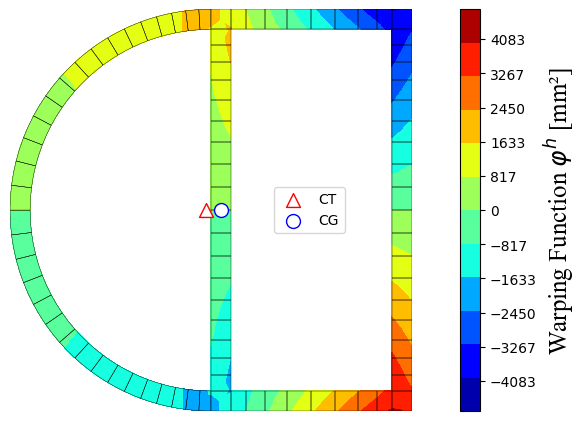

In [8]:
fig, ax = sec.plotWarping(levels=12, showMesh=True, unit='mm', figsize=(10,5))
ax.axis('off')
ax.get_legend().set_bbox_to_anchor([.85,.5])
# CT is the modulus weighted Center of Torsion (aka the shear center)
# CG is the modulus weighted Center of Gravity (aka the centroid)

Shear stress distribution (as vector field)

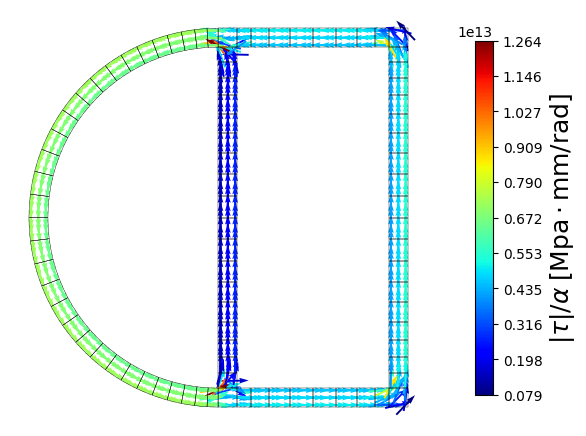

In [9]:
fig2, ax2 = sec.plotShearStresses(degree=4, 
                                  width=1,scale=.07, headlength=5, 
                                  figsize=(10,5), 
                                  cbarKwargs=dict(shrink=.85)
                                  )

ax2.axis('off')
print('')

Shear stress distribution (as component-wise scalar fields). 


<div class="alert alert-block alert-success">
<b>Important:</b> Empty spaces appear because the stresses are calculated at <i>Gauss points</i> and <b>not at nodes</b>. This is done to prevent graphical issues arising from discontinuities between elements, since the stress field is not guaranteed to be C^0 continuous. Better results could be achieved by the implementation of a stress recovery routine.
</div>
 

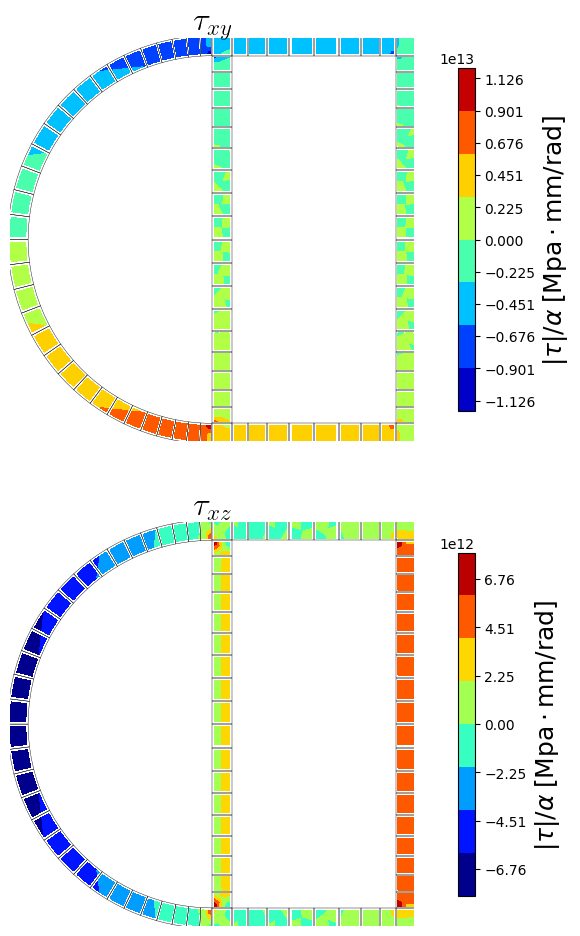

In [12]:
## Shear stresses (component wise scalar fields)
fig3, ax3 = sec.plotShearStresses(degree=4, mode='scalar',showMesh=True,
                                  figsize=(12,5), 
                                  cbarKwargs=dict(shrink=.85)
                                  )
fig3.tight_layout()
# Remove axis frame 
{ax.axis('off') for ax in ax3}
print('')